# **Content:**
- [Environment Preparation & Importing Data](#data-overview--statistical-summary)
- [Exploratory Data Analysis:](#exploratory-data-analysis)
    - [Data overview & Statistical summary](#data-overview--statistical-summary)
    - [Null detection & 2 dataframes combination](#null-detection--2-dataframes-combination)
    - [Test of normal distribution (QQ Plot and empirical rule test)](#testing-normal-distribution-qq-plot--empirical-rule)
    - [Outliers detection and removal](#outlier-detection--removal)
- [Hypothesis Testing:](#hypothesis-testing)
    - [Two sample t-test](#two-sample-t-test)
    - [One sample t-test](#one-sample-t-test)
    - [One sample proportion z-test](#one-sample-proportion-z-test)
    - [Two sample proportion z-test](#two-sample-proportion-z-test)

# **Environment Preparation & Importing Data**

In [ ]:
import os
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [16]:
gender = pd.read_csv("Data/gender_submission.csv")
train = pd.read_csv("Data/train.csv")
test = pd.read_csv("Data/test.csv")

# **Exploratory Data Analysis:**

## **Data Overview & Statistical Summary**

In [3]:
print(gender.head(5))
print(train.head(5))
print(test.head(5))

   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  S

In [4]:
print("Data Shape")
print(train.shape)
print("="*50)
print("Data Overview")
print(train.info())
print("="*50)
print("Data Statistical Summary")
print(train.describe())

Data Shape
(891, 12)
Data Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
Data Statistical Summary
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308

In [5]:
train["PassengerId"].duplicated().sum()

0

## **Null detection & 2 dataframes combination**

In [6]:
print(f"Sample size = {len(train)}")
print(f"Number of null values = {train.Age.isna().sum()}")
print(f"%{round((train.Age.isna().sum() / len(train)) * 100, 2)} of the data is null")

Sample size = 891
Number of null values = 177
%19.87 of the data is null


In [7]:
print(f"Sample size = {len(test)}")
print(f"NUll Values = {test.Age.isna().sum()}")
print(f"%{round((test.Age.isna().sum() / len(test)) * 100, 2)} of the data is null")

Sample size = 418
NUll Values = 86
%20.57 of the data is null


In [8]:
test2 = pd.merge(test, gender, on="PassengerId")

In [9]:
df1 = train[~train["Age"].isna()]
df2 = test2[~test2["Age"].isna()]
data = pd.concat([df1, df2], axis=0).reset_index()
print(f"Sample Size = {len(data)}")
print(f"NUll Values = {data.Age.isna().sum()}")

Sample Size = 1046
NUll Values = 0


## **Testing Normal Distribution (QQ Plot & Empirical Rule)**

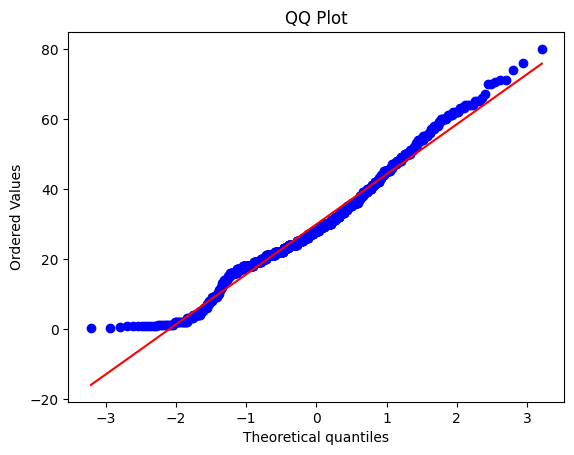

In [10]:
stats.probplot(data["Age"], dist="norm", plot=plt)
plt.title("QQ Plot")
plt.show()

In [11]:
data["zscores"] = stats.zscore(data.Age)

In [12]:
len(data["zscores"])

1046

In [13]:
percentage = [len(data[(data["zscores"] >= -i) & (data["zscores"] <= i)]) / len(data["zscores"]) * 100 for i in range(1,4)]

summary = pd.DataFrame({
    "Standard Diviation": ["One", "Two", "Three"],
    "Percent": percentage
})

summary

,Standard Diviation,Percent
0,One,72.179732
1,Two,93.785851
2,Three,99.713193


## **Outlier Detection & Removal**

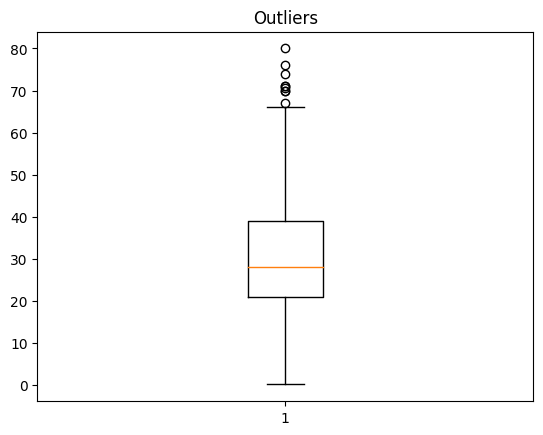

In [14]:
plt.title("Outliers")
plt.boxplot(data["Age"])
plt.show()

In [15]:
titanic = data[~(data["zscores"] > 3) | (data["zscores"] < -3)].drop(columns="index")

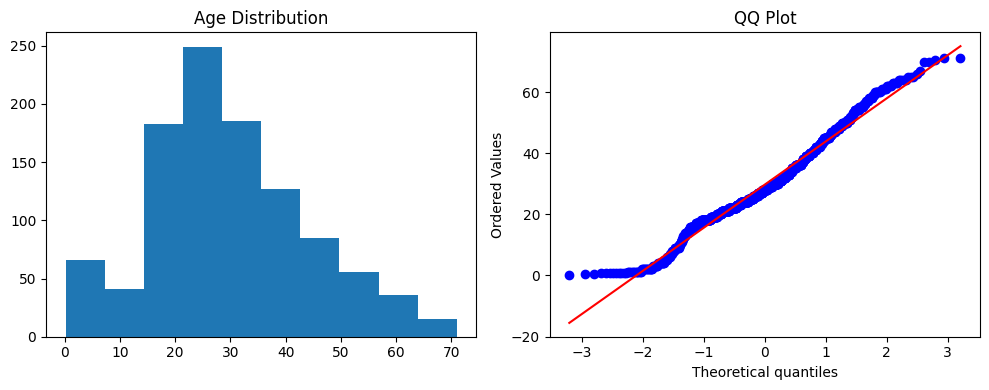

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].hist(titanic["Age"])
axes[0].set_title("Age Distribution")

stats.probplot(titanic["Age"], dist="norm", plot=axes[1])
axes[1].set_title("QQ Plot")

plt.tight_layout()

# **Hypothesis Testing**

## **Two sample t-test**

### **Request 1**

$H_0: \bar{x}_s = \bar{x}_n$

$H_a: \bar{x}_s \not= \bar{x}_n$

$\alpha = 0.05$

In [17]:
sur_ages = titanic["Age"][titanic["Survived"] == 1 ]
non_sur_ages = titanic["Age"][titanic["Survived"] == 0 ]

In [18]:
t_stat, p_value = stats.ttest_ind(sur_ages, non_sur_ages, equal_var=False)
print(f'''
t-stat  = {t_stat}
p-value = {p_value}
''')


t-stat  = -1.9198625772873636
p-value = 0.05521147817069825



### **Interpretation**

1- **Two-tailed test:**

$p (0.055) > \alpha (0.05)$

**Failed to reject** the null hypothesis at 5% significance level, there's no statistically significantly enough evidence to say that that there was a difference in average age between survivors and non-survivors.

---

## **One sample t-test**

### **Request 2**

$H_0: \mu = 30$

$H_a: \mu \not= 30$

$\alpha = 0.05$

In [19]:
t_stat, p_value = stats.ttest_1samp(titanic["Age"], 30, alternative="two-sided")

print(f'''
t-stat  = {t_stat}
p-value = {p_value}
''')


t-stat  = -0.5758628383046217
p-value = 0.5648322416700311



### **Interpretation**

**Two-tailed test:**

$p (0.56) > \alpha (0.05)$

**Failed to reject** the null hypothesis, there's no enough statistically significant evidence to prove that the average age was not 30.

Text(0.95, 0.95, 'p-value = 0.565\nFail to reject H₀')

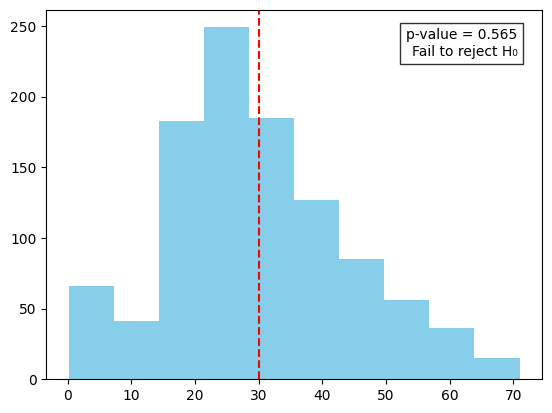

In [20]:
plt.hist(titanic["Age"].dropna(), color="skyblue")
plt.axvline(30, color="red", linestyle="--")
plt.text(
    0.95, 0.95, 
    f"p-value = {p_value:.3f}\nFail to reject H₀", 
    transform=plt.gca().transAxes, 
    ha="right", 
    va="top",
    bbox=dict(facecolor="white", alpha=0.8)
)

In [21]:
stats.t.interval(0.95,
                 df=len(titanic["Age"]) - 1,
                 loc=titanic["Age"].mean(),
                 scale=np.std(titanic["Age"]) / np.sqrt(len(titanic["Age"])))

(28.88341487922581, 30.609720307734875)

There's a %95 chance of getting the correct population age average in the confidence interval of [28.9, 30.6]

---

## **One Sample Proportion z-test**

### **Request 3**

### **First Method: Using the mathematical equation**

$H_0: P_0 = 0.65$

$H_0: P_0 \neq 0.65$

$\alpha = 0.05$

$\hat{P} = \frac{x}{n}$

$Z_s = \frac{\hat{P} - P_0}{\sqrt{\frac{P_0 \cdot Q_0}{n}}}$



In [22]:
titanic.Pclass.unique()

array([3, 1, 2])

In [23]:
fc_ages = titanic["Age"][titanic["Pclass"] == 1]
fc_survivors_ages = titanic["Age"][(titanic["Pclass"] == 1) & (titanic["Survived"] == 1)]

In [24]:
p_hat = len(fc_survivors_ages) / len(fc_ages)
Z_stat = (p_hat - 0.65) / (np.sqrt((0.65 * (1 - 0.65)) / len(fc_ages)))
z_crit = stats.norm.ppf(1 - (0.05/2))
p_value = 2 * (1 - stats.norm.cdf(abs(Z_stat)))

print(f"z statistic = {round(abs(Z_stat), 2)}")
print(f"z critical  = {round(z_crit, 2)}")
print(f"p-value     = {round(p_value, 3)}")

z statistic = 1.91
z critical  = 1.96
p-value     = 0.056


### **Alternative Method: Using `proportions_ztest` from `statsmodels.stats.proportion`**

In [25]:
from statsmodels.stats.proportion import proportions_ztest

z_stats4, p_value4 = proportions_ztest(count=len(fc_survivors_ages),
                                        value=0.65,
                                        prop_var=0.65,
                                        nobs=len(fc_ages),
                                        alternative="two-sided")

print("Historical Proportion = 0.65")
print(f"z statistic = {round(abs(z_stats4), 2)}")
print(f"z critical  = {round(z_crit, 2)}")
print(f"p-value     = {round(p_value4, 3)}")

Historical Proportion = 0.65
z statistic = 1.91
z critical  = 1.96
p-value     = 0.056


### **Interpretation**

$p(0.056) > \alpha(0.05)$

$Z_s(1.91) < Z_c(1.96)$

At the 0.05 significance level, we **fail to reject** the null hypothesis. The data does not provide sufficient statistical evidence to conclude that the survival rate of first-class passengers on the Titanic was different from 65%. In other words, based on our sample, the observed survival proportion is consistent with the historical claim of 65%.

---

## **Two Sample Proportion z-test**

### **Request 4**

### **First Method: Using the mathematical equation**

$H_0: \hat{p}_m = \hat{p}_f$

$H_a: \hat{p}_m \neq \hat{p}_f$

$\alpha = 0.05$

$p_0 = \frac{x_m + x_f}{n_m + n_f}$

$Z_s = \frac{p_m - p_f}{\sqrt{p_0 \cdot q_0 (\frac{1}{n_m} + \frac{1}{n_f})}}$

In [26]:
survival_gender = pd.concat([train,test])[["Sex", "Survived"]]

print(f"Sample size removed null ages = {len(titanic)}")
print(f"New sample size               = {len(survival_gender)}")

Sample size removed null ages = 1043
New sample size               = 1309


In [27]:
male = len(survival_gender[survival_gender["Sex"] == "male"])
female = len(survival_gender[survival_gender["Sex"] == "female"])

male_sur = len(survival_gender[(survival_gender["Sex"] == "male") & (survival_gender["Survived"] == 1)])
female_sur = len(survival_gender[(survival_gender["Sex"] == "female") & (survival_gender["Survived"] == 1)])

p_m = male_sur / male
p_f = female_sur / female 
p_0 = (male_sur + female_sur) / (male + female)

Z_stat2 = (p_m - p_f) / (np.sqrt(p_0 * (1 - p_0) * ((1/male) + (1/female))))
z_crit2 = stats.norm.ppf(1 - 0.05/2)
p_value2 = 2 * (1 - stats.norm.cdf(abs(Z_stat2)))

print(f"Proportion of survived male passengers   = {round(p_m, 2)}")
print(f"Proportion of survived female passengers = {round(p_f, 2)}")
print(f"z statistic = {round(abs(Z_stat2), 2)}")
print(f"z critical  = {round(z_crit2, 2)}")
print(f"p-value     = {p_value2}")

Proportion of survived male passengers   = 0.13
Proportion of survived female passengers = 0.5
z statistic = 14.62
z critical  = 1.96
p-value     = 0.0


### **Alternative Method: Using `proportions_ztest` from `statsmodels.stats.proportion`**

In [28]:
z_stats3, p_value3 = proportions_ztest(count=[male_sur,female_sur],
                                        nobs=[male,female],
                                        alternative="two-sided")

print(f"Proportion of survived male   = {round(p_m, 2)}")
print(f"Proportion of survived female = {round(p_f, 2)}")
print(f"z statistic = {round(abs(z_stats3), 2)}")
print(f"z critical  = {round(z_crit2, 2)}")
print(f"p-value     = {p_value3}")

Proportion of survived male   = 0.13
Proportion of survived female = 0.5
z statistic = 14.62
z critical  = 1.96
p-value     = 2.172720641443993e-48


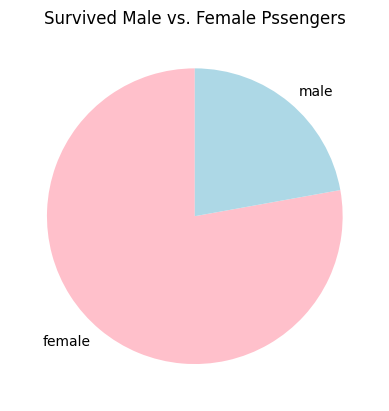

In [29]:
survivors = titanic["Sex"][titanic["Survived"] == 1]
gender_comparason = survivors.value_counts()

plt.title("Survived Male vs. Female Pssengers")
plt.pie(gender_comparason,
        labels=gender_comparason.index,
        startangle=90,
        colors=["pink", "lightblue"])
plt.show()

### **Interpretation**

$p-value < \alpha(0.05)$

$Z_s(14.62) > Z_c(1.96)$

There's a **very strong** statistical evidence that there was a difference in survival rate between men and women from the titanic disaster. In fact, the survival rate of women was massive compared to men's, so that we **reject** the null hypothesis.